# Plot Bollinger Bands for a selected stock


Compute Bollinger Bands with custom rolling window.

Plot contain:
* Bollinger Bands
* Mean
* Std dev
* Rolling max values
* Ticker at Close value

In [1]:
import matplotlib.pyplot as plt
# base code for Yahoo Finance API data access
import yfinance as yf
import pandas as pd
# select ticker
some_ticker = yf.Ticker("MBG.DE")

# get historical market data
hist = some_ticker.history(period="1000d")


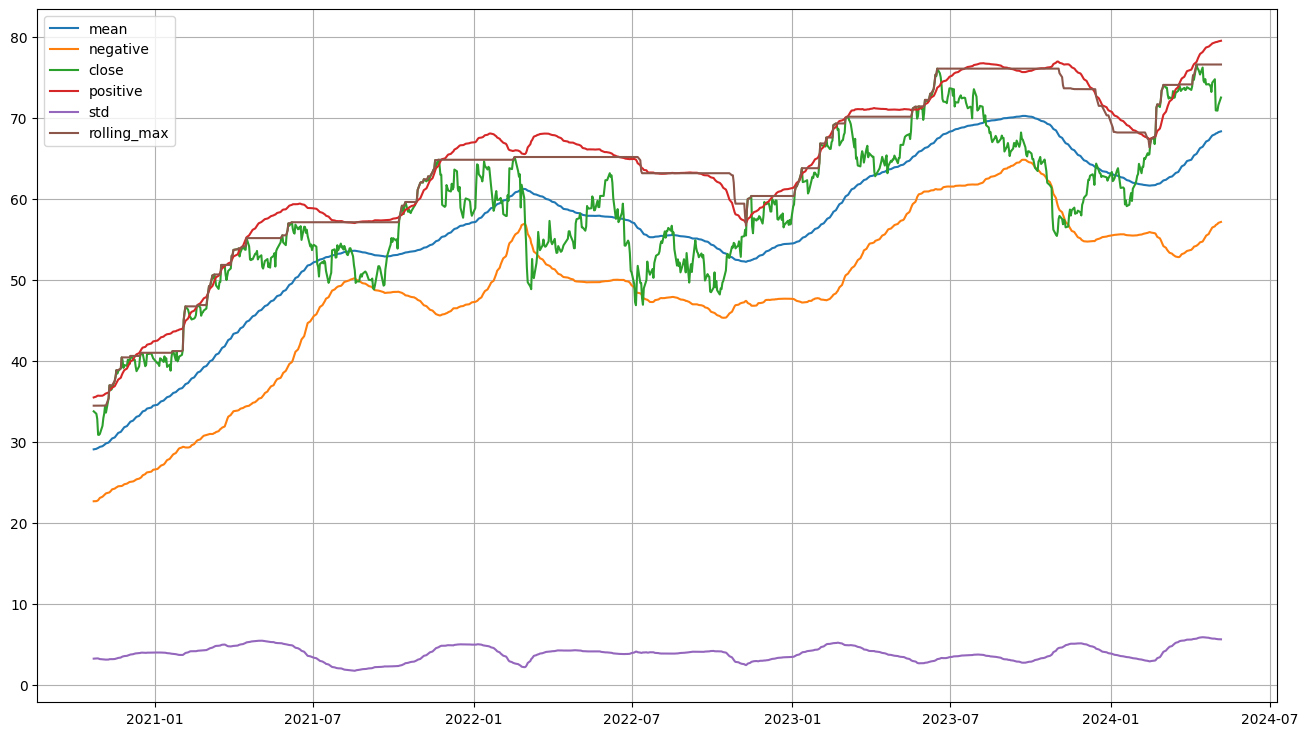

In [13]:

def compute_bollinger(df, column,  rolling_window_size = 20):
    """
    Return reduced dataframe with bollinger bands
    """
    dataframe = pd.DataFrame()
    dataframe["mean"]    = df[column].rolling(rolling_window_size).mean()
    dataframe["negative"] = dataframe["mean"] - 2 * (df[column].rolling(rolling_window_size).std())
    dataframe["close"]    = df[column]
    dataframe["positive"] = dataframe["mean"] + 2 * (df[column].rolling(rolling_window_size).std()) # 2x std dev.
    dataframe["std"] = df[column].rolling(rolling_window_size).std()
    dataframe["rolling_max"] = df[column].rolling(rolling_window_size).max()

    # drop NaNs
    return dataframe.dropna()

fig, ax = plt.subplots(figsize=(16, 9))
bollinger = compute_bollinger(hist, "Close", rolling_window_size = 20)

#plt.plot(bollinger[200:len(bollinger)], label=bollinger.columns)
plt.plot(bollinger, label=bollinger.columns)
plt.legend()
plt.grid()
plt.show()